# IA 71 : Projet 2 

*Import des codes pythons*


In [4]:
# Importer les modules
from graphe import GrapheNonOriente
from utils import generer_graphe_aleatoire, afficher_graphes_cote_a_cote
from dijkstra import dijkstra_naif, dijkstra_tas
from performance import visualiser_performances

# Explication du Code de la Classe `GrapheNonOriente`

Le code définit une classe `GrapheNonOriente`, qui représente un graphe non orienté en utilisant une **liste d'adjacence**. Un graphe non orienté est un graphe dans lequel les arêtes n'ont pas de direction, c'est-à-dire que si une arête existe entre deux sommets, elle est valide dans les deux directions.

## Structure de la Classe

### 1. Initialisation du Graphe

Cette partie du code initialise un graphe vide en créant un dictionnaire appelé **`adjacence`**. Ce dictionnaire sert de structure de données pour stocker les sommets et leurs voisins. Chaque sommet est une clé dans ce dictionnaire, et la valeur associée est un autre dictionnaire représentant les voisins de ce sommet avec leurs poids respectifs.

### 2. Ajouter un Sommet

Lorsqu'un nouveau sommet est ajouté au graphe, il est inséré dans le dictionnaire `adjacence` si ce sommet n'est pas déjà présent. Cela garantit que tous les sommets sont enregistrés dans le graphe avant l'ajout d'éventuelles arêtes. Chaque sommet ajouté est initialisé avec un dictionnaire vide représentant ses voisins.

### 3. Ajouter une Arête

L'ajout d'une arête dans ce graphe non orienté implique de relier deux sommets, appelés **sommet1** et **sommet2**, avec un poids donné. L'arête est ajoutée dans les deux directions : de **sommet1** vers **sommet2** et de **sommet2** vers **sommet1**. Si les sommets n'existent pas encore dans le graphe, ils sont d'abord ajoutés avant d'ajouter l'arête.

### 4. Supprimer un Sommet

Lorsqu'un sommet est supprimé, toutes les arêtes qui le relient à d'autres sommets doivent également être supprimées. Cela signifie qu'avant de supprimer le sommet, toutes les connexions (arêtes) de ce sommet doivent être supprimées dans les deux directions. Ensuite, le sommet lui-même est supprimé du dictionnaire `adjacence`.

### 5. Supprimer une Arête

La suppression d'une arête entre deux sommets consiste à retirer l'entrée correspondante dans le dictionnaire de chaque sommet impliqué. Étant donné que le graphe est non orienté, l'arête est supprimée dans les deux sens : de **sommet1** vers **sommet2** et de **sommet2** vers **sommet1**.

### 6. Obtenir la Liste des Sommets

Cette méthode permet de récupérer la liste des sommets présents dans le graphe. La liste est obtenue simplement en récupérant les clés du dictionnaire `adjacence`, qui représentent tous les sommets du graphe.

### 7. Obtenir la Liste des Arêtes

La méthode qui retourne les arêtes du graphe parcourt tous les sommets et leurs voisins dans le dictionnaire `adjacence`. Chaque arête est représentée par un tuple contenant les deux sommets reliés et le poids de l'arête. Pour éviter les doublons, l'arête entre **sommet1** et **sommet2** n'est ajoutée qu'une seule fois, c'est-à-dire que si une arête est ajoutée de **sommet1** à **sommet2**, l'inverse ne sera pas ajouté à nouveau.

## Conclusion

La classe `GrapheNonOriente` permet de créer, modifier, et interroger un graphe non orienté en utilisant une liste d'adjacence. Elle inclut des méthodes pour :

- Ajouter et supprimer des sommets et des arêtes,
- Obtenir les sommets et les arêtes du graphe.

Elle fournit une représentation de base d'un graphe qui peut être utilisée pour appliquer différents algorithmes sur des graphes (comme Dijkstra, BFS, DFS, etc.). Cette classe pourrait être étendue pour inclure des fonctionnalités supplémentaires, telles que la recherche de chemins, la détection de cycles, ou d'autres algorithmes sur les graphes.


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Génération Aléatoire :


# Explication du Code de la Génération et Affichage de Graphes

Ce code permet de générer un graphe non orienté connexe de manière aléatoire, d'ajouter des arêtes entre les sommets et de les afficher côte à côte pour différentes tailles de graphes. Deux fonctions principales sont définies : `generer_graphe_aleatoire` pour générer un graphe et `afficher_graphes_cote_a_cote` pour afficher ces graphes.

## Fonction 1 : `generer_graphe_aleatoire`

### Objectif
Cette fonction génère un graphe non orienté connexe avec un nombre spécifié de sommets et d'arêtes. Elle vérifie également que le nombre d'arêtes est valide et génère un arbre couvrant avant d'ajouter des arêtes supplémentaires de manière aléatoire.

### 1. Vérification des Paramètres

Avant de générer le graphe, la fonction effectue deux vérifications importantes :
- **Connexité du Graphe** : Le nombre d'arêtes doit être au moins `n - 1` (où `n` est le nombre de sommets) pour garantir que le graphe est connexe. Sinon, une exception `ValueError` est levée.
- **Limite sur les Arêtes** : Le nombre d'arêtes ne doit pas dépasser le maximum possible dans un graphe simple et non orienté, qui est donné par la formule `(n * (n - 1)) // 2`. Si ce nombre est dépassé, une exception est également levée.

### 2. Création du Graphe

La fonction commence par créer un graphe vide, puis ajoute les sommets un par un. Pour assurer la connexité du graphe, elle génère un arbre couvrant en reliant des sommets déjà connectés à des sommets non encore connectés de manière aléatoire.

### 3. Ajout des Arêtes

Une fois l'arbre couvrant généré, des arêtes supplémentaires sont ajoutées aléatoirement entre les sommets. La fonction s'assure qu'aucune arête ne soit ajoutée deux fois entre les mêmes sommets.

### 4. Retour du Graphe

Le graphe généré est retourné sous forme d'une instance de la classe `GrapheNonOriente`.

## Fonction 2 : `afficher_graphes_cote_a_cote`

### Objectif
Cette fonction permet d'afficher plusieurs graphes côte à côte pour différentes tailles de graphes, facilitant la comparaison visuelle des structures générées.

### 1. Création de la Figure

La fonction commence par créer une figure avec une grille de sous-graphes. Le nombre de sous-graphes est déterminé par la liste `tailles_graphes`, qui contient les tailles des graphes à afficher. La figure est définie pour avoir une seule ligne et `n` colonnes, où `n` est la longueur de `tailles_graphes`.

### 2. Génération et Affichage des Graphes

Pour chaque taille de graphe spécifiée dans la liste `tailles_graphes`, la fonction effectue les étapes suivantes :
- **Calcul du Nombre d'Arêtes** : Le nombre d'arêtes est calculé en fonction de la densité souhaitée (30 % des arêtes possibles pour chaque taille de graphe), avec un minimum de `n - 1` pour garantir la connexité.
- **Génération du Graphe** : La fonction `generer_graphe_aleatoire` est appelée pour générer un graphe avec la taille spécifiée et le nombre d'arêtes calculé.
- **Affichage** : Le graphe est converti en un graphe NetworkX, qui permet de visualiser les graphes facilement. Les sommets sont dessinés avec des étiquettes et les arêtes avec des poids. Chaque graphe est affiché dans une sous-figure (un des axes créés pour la figure).

### 3. Disposition et Affichage

Les graphes sont disposés côte à côte dans la figure, et la fonction utilise `plt.tight_layout()` pour ajuster l'espacement entre les sous-graphes et éviter que les titres ou les éléments graphiques ne se chevauchent.

### 4. Affichage Final

Enfin, la fonction affiche la figure avec tous les graphes générés côte à côte.

## Conclusion

Les deux fonctions définies dans ce code permettent de créer des graphes non orientés aléatoires et de les visualiser de manière pratique. La fonction `generer_graphe_aleatoire` assure la génération de graphes connexes avec un nombre spécifié d'arêtes et de sommets, tandis que `afficher_graphes_cote_a_cote` permet de comparer facilement plusieurs graphes de tailles différentes.

Ce type de visualisation est utile pour analyser l'impact de la taille des graphes sur leur structure et leur densité d'arêtes.


---


 # Implémentations de Dijkstra :

# Explication du Code des Algorithmes de Dijkstra

Ce code présente deux implémentations de l'algorithme de Dijkstra pour le calcul des plus courts chemins dans un graphe non orienté. La première implémentation utilise une méthode naïve, tandis que la seconde utilise un tas binaire pour améliorer l'efficacité. Chaque implémentation mesure également le nombre d'opérations et de comparaisons effectuées pendant l'exécution.

## Fonction 1 : `dijkstra_naif`

### Objectif
Cette fonction implémente l'algorithme de Dijkstra de manière naïve en utilisant une recherche linéaire pour trouver le sommet avec la distance minimale parmi les sommets non visités. Elle est accompagnée d'un comptage des opérations et des comparaisons effectuées pendant le calcul.

### 1. Initialisation

- **Distantes Initiales** : Un dictionnaire `distances` est créé pour stocker la distance minimale de chaque sommet au sommet de départ. Toutes les distances sont initialisées à l'infini (`float('inf')`), sauf la distance du sommet de départ qui est définie à zéro.
- **Prédécesseurs** : Un dictionnaire `predecesseurs` est créé pour garder une trace des prédécesseurs de chaque sommet, afin de reconstruire le chemin le plus court.
- **Sommets Non Visités** : Un ensemble `non_visites` est utilisé pour suivre les sommets qui n'ont pas encore été explorés.

### 2. Boucle Principale

La fonction entre dans une boucle `while` qui continue tant qu'il existe des sommets non visités :
- **Choix du Sommet Courant** : À chaque itération, le sommet ayant la distance minimale est choisi à l'aide de la fonction `min()`. Le nombre de comparaisons et d'opérations est compté ici.
- **Mise à Jour des Distances** : Pour chaque voisin du sommet courant, si une distance plus courte est trouvée, elle est mise à jour et le prédecesseur du voisin est défini. Les opérations et comparaisons sont également comptées pendant cette étape.

### 3. Retour des Résultats

La fonction retourne quatre valeurs :
- `distances` : Dictionnaire des distances minimales de chaque sommet au sommet de départ.
- `predecesseurs` : Dictionnaire des prédécesseurs de chaque sommet.
- `operations` : Nombre total d'opérations effectuées.
- `comparisons` : Nombre total de comparaisons effectuées.

## Fonction 2 : `dijkstra_tas`

### Objectif
Cette fonction implémente l'algorithme de Dijkstra en utilisant un tas binaire (min-heap) pour extraire plus efficacement le sommet ayant la distance minimale. Cette approche réduit la complexité de recherche du sommet à extraire.

### 1. Initialisation

Les initialisations sont similaires à celles de l'implémentation naïve :
- **Distantes Initiales** et **Prédécesseurs** : Comme dans l'implémentation précédente, un dictionnaire `distances` est utilisé pour stocker les distances minimales, et un dictionnaire `predecesseurs` pour les prédécesseurs.
- **Tas Binaire** : Un tas binaire `tas` est initialisé avec le sommet de départ et sa distance (qui est 0).
- **Sommets Visités** : Un ensemble `visites` est utilisé pour marquer les sommets déjà explorés.

### 2. Boucle Principale

La boucle `while` continue tant que le tas contient des éléments :
- **Extraction du Sommet Courant** : À chaque itération, le sommet avec la distance minimale est extrait du tas à l'aide de `heappop()`. Le nombre d'opérations est incrémenté pour chaque extraction du tas.
- **Mise à Jour des Distances** : Pour chaque voisin du sommet courant, si une distance plus courte est trouvée, elle est mise à jour et le voisin est ajouté au tas avec sa nouvelle distance. Les opérations d'insertion dans le tas et les comparaisons pour insérer sont comptées à chaque ajout dans le tas.

### 3. Retour des Résultats

Cette fonction retourne également quatre valeurs :
- `distances` : Dictionnaire des distances minimales.
- `predecesseurs` : Dictionnaire des prédécesseurs.
- `operations` : Nombre total d'opérations effectuées.
- `comparisons` : Nombre total de comparaisons effectuées.

## Comparaison des Deux Implémentations

- **Méthode Naïve** : La méthode naïve utilise une recherche linéaire pour extraire le sommet ayant la distance minimale parmi les sommets non visités. Cette approche est moins efficace, surtout pour de grands graphes, car la recherche prend un temps proportionnel au nombre de sommets non visités.
- **Méthode avec Tas Binaire** : En utilisant un tas binaire, l'extraction du sommet de distance minimale et l'insertion de nouveaux sommets dans le tas sont plus efficaces. La complexité temporelle est réduite, ce qui améliore les performances sur les graphes de grande taille.

Les deux méthodes comptabilisent les opérations et les comparaisons effectuées pendant l'exécution, ce qui permet d'évaluer leur performance en termes de nombre d'opérations effectuées pour résoudre le problème.

### Conclusion

Les deux implémentations de l'algorithme de Dijkstra permettent de calculer les plus courts chemins depuis un sommet de départ, mais l'utilisation d'un tas binaire dans la deuxième implémentation offre des gains significatifs en termes d'efficacité, notamment pour les grands graphes. Le comptage des opérations et des comparaisons dans chaque méthode permet de mieux comprendre l'impact de l'optimisation sur les performances.


- - - - - - - - - - - - - - - -

# Fonctions de comparaison et visualisation :

# Explication du Code pour la Comparaison des Performances de Dijkstra

Ce code permet de comparer les performances de deux implémentations de l'algorithme de Dijkstra : l'une utilisant la méthode naïve et l'autre utilisant un tas binaire. La comparaison porte sur deux aspects : le temps d'exécution et le nombre d'opérations effectuées pour calculer les plus courts chemins dans des graphes aléatoires.

## Fonction 1 : `comparer_performances`

### Objectif
La fonction `comparer_performances` mesure et compare les performances des deux implémentations de l'algorithme de Dijkstra (naïf et avec tas) sur des graphes aléatoires de différentes tailles.

### Paramètres
- **`tailles_graphes`** : Liste des tailles des graphes (nombre de sommets) pour lesquels la comparaison des performances sera effectuée.
- **`densite`** : Densité des arêtes dans le graphe, par défaut fixée à 0.3. Cela influence le nombre d'arêtes générées pour chaque graphe.

### 1. Initialisation des Listes
Quatre listes sont initialisées pour stocker les résultats :
- **`temps_naif`** : Temps d'exécution pour l'algorithme de Dijkstra naïf.
- **`temps_tas`** : Temps d'exécution pour l'algorithme de Dijkstra avec tas binaire.
- **`operations_naif`** : Nombre total d'opérations effectuées par l'algorithme naïf.
- **`operations_tas`** : Nombre total d'opérations effectuées par l'algorithme avec tas.

### 2. Boucle sur les Tailles de Graphes
Pour chaque taille de graphe donnée dans `tailles_graphes`, le code :
- Calcule le nombre d'arêtes en fonction de la densité spécifiée.
- Génère un graphe aléatoire de cette taille et densité en utilisant la fonction `generer_graphe_aleatoire`.

### 3. Mesure du Temps et des Opérations
Pour chaque graphe généré, la fonction mesure :
- **Le Temps d'Exécution** : Le temps que prend chaque implémentation de Dijkstra pour calculer les plus courts chemins depuis un sommet de départ. Cela est mesuré à l'aide de la fonction `time.time()`.
- **Le Nombre d'Opérations** : Le nombre d'opérations (incluant les comparaisons) effectuées par chaque implémentation.

### 4. Retour des Résultats
La fonction retourne quatre listes contenant les résultats :
- `temps_naif` : Liste des temps d'exécution pour chaque taille de graphe avec Dijkstra naïf.
- `temps_tas` : Liste des temps d'exécution pour chaque taille de graphe avec Dijkstra utilisant un tas binaire.
- `operations_naif` : Liste des nombres d'opérations pour chaque taille de graphe avec Dijkstra naïf.
- `operations_tas` : Liste des nombres d'opérations pour chaque taille de graphe avec Dijkstra utilisant un tas binaire.

## Fonction 2 : `visualiser_performances`

### Objectif
La fonction `visualiser_performances` est utilisée pour afficher les résultats de la comparaison des performances dans deux graphiques côte à côte :
- Le premier graphique montre la **comparaison du temps d'exécution**.
- Le second graphique montre la **comparaison du nombre d'opérations**.

### 1. Création des Graphiques
- **Temps d'Exécution** : Le premier graphique compare le temps d'exécution des deux implémentations de Dijkstra pour chaque taille de graphe.
- **Nombre d'Opérations** : Le second graphique compare le nombre d'opérations (inclus les comparaisons) pour chaque implémentation.

### 2. Personnalisation des Graphiques
- Les graphiques sont tracés avec des courbes (`'o-'`) pour chaque méthode de Dijkstra.
- Des légendes sont ajoutées pour distinguer les deux méthodes (`Dijkstra naïf` et `Dijkstra avec tas`).
- Les titres des graphiques et les axes sont définis pour clarifier les informations affichées.

### 3. Affichage des Graphiques
Les deux graphiques sont affichés côte à côte dans une seule figure en utilisant la fonction `plt.tight_layout()` pour ajuster l'espacement et éviter les chevauchements.

## Conclusion

Les résultats affichés permettent de comparer de manière visuelle et quantitative les performances des deux implémentations de l'algorithme de Dijkstra sur des graphes de différentes tailles. On s'attend à ce que la méthode utilisant le tas binaire soit plus rapide et effectue moins d'opérations pour les grands graphes par rapport à l'implémentation naïve.


 - - - - - - - - - - - - - - - - - -

# Résultats :



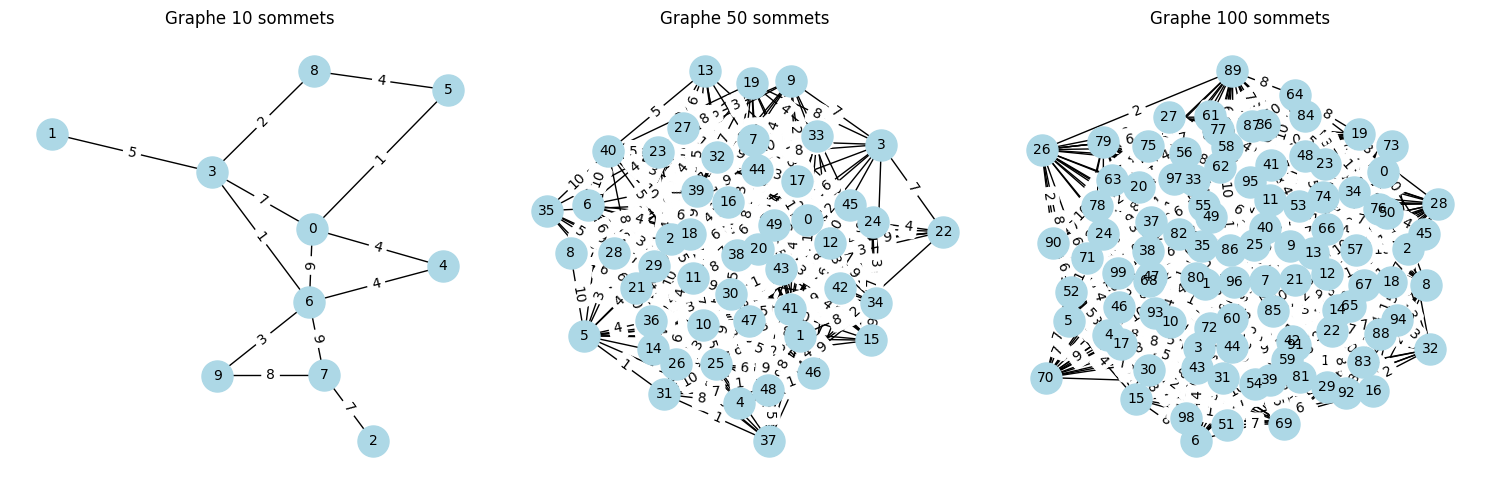

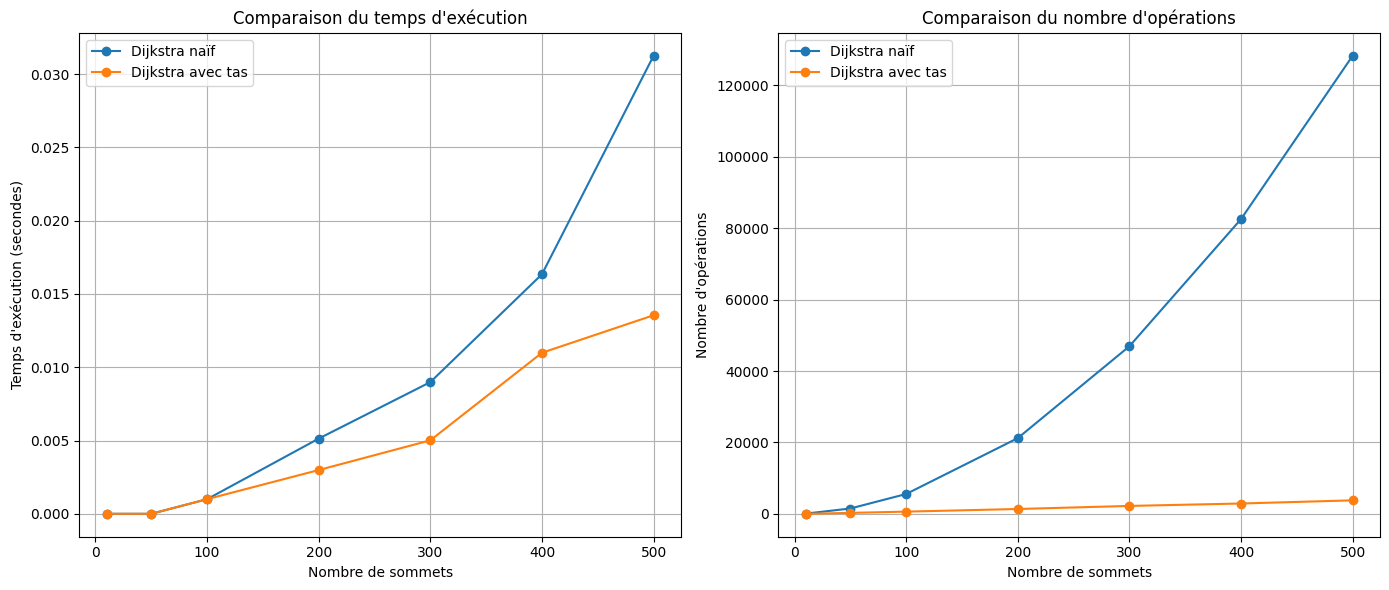

In [5]:
# Afficher les graphes de différentes tailles côte à côte
afficher_graphes_cote_a_cote([10, 50, 100]) # Les valeurs sont modifiables

# Visualiser les performances
visualiser_performances()


# Interprétation des Résultats de la Comparaison des Algorithmes de Dijkstra

## Contexte

Nous avons comparé les performances de deux implémentations de l'algorithme de Dijkstra sur des graphes de tailles variées. Les graphes sont générés aléatoirement avec différentes tailles de sommets et d'arêtes. Les deux versions de Dijkstra que nous avons comparées sont :

1. **Dijkstra naïf** : Une version basique de l'algorithme qui utilise une recherche linéaire pour trouver le sommet ayant la distance la plus faible.
2. **Dijkstra avec tas (prioritaire)** : Une version optimisée qui utilise un tas binaire pour améliorer la recherche du sommet ayant la plus petite distance, réduisant ainsi la complexité.

## Analyse des Graphiques

Nous avons tracé deux graphiques côte à côte pour comparer les performances des deux implémentations :

1. **Graphique 1 - Temps d'exécution** : Ce graphique montre le temps d'exécution (en secondes) de chaque algorithme en fonction du nombre de sommets dans le graphe. 
   
2. **Graphique 2 - Nombre d'opérations** : Ce graphique illustre le nombre d'opérations effectuées par chaque algorithme en fonction de la taille du graphe. Chaque opération représente une action clé dans l'algorithme, comme la mise à jour d'une distance ou l'extraction d'un sommet du tas.

## Observations

1. **Temps d'exécution** :
   - Le temps d'exécution de **Dijkstra naïf** augmente de manière significative avec la taille du graphe. Cette tendance est attendue car l'algorithme naïf, en raison de sa recherche linéaire pour le sommet à visiter, présente une complexité quadratique \(O(n^2)\) dans le cas où il n'y a pas d'optimisation supplémentaire.
   - En revanche, **Dijkstra avec tas** montre une croissance bien plus modérée du temps d'exécution, avec une complexité en \(O((n + e) \log n)\), où \(n\) est le nombre de sommets et \(e\) le nombre d'arêtes. Le temps d'exécution reste beaucoup plus faible, même pour les grands graphes.

2. **Nombre d'opérations** :
   - Le nombre d'opérations du **Dijkstra naïf** augmente également de façon quadratique avec la taille du graphe, ce qui est cohérent avec la complexité théorique de l'algorithme. La recherche linéaire pour trouver le sommet de moindre distance nécessite de nombreuses comparaisons, ce qui se traduit par un nombre élevé d'opérations.
   - Pour **Dijkstra avec tas**, le nombre d'opérations augmente plus lentement. Les opérations effectuées dans le tas, comme l'extraction de la distance minimale et l'insertion dans le tas, sont beaucoup plus efficaces que la recherche linéaire, ce qui réduit considérablement le nombre d'opérations.

## Conclusion

- **Dijkstra naïf** est adapté pour des graphes de petite taille, mais devient rapidement inefficace à mesure que la taille du graphe augmente en raison de sa complexité \(O(n^2)\).
- **Dijkstra avec tas**, grâce à sa complexité améliorée \(O((n + e) \log n)\), s'avère être bien plus performant, notamment pour des graphes de grande taille. Il est donc recommandé d'utiliser l'algorithme optimisé avec tas pour des applications nécessitant de traiter des graphes plus complexes et plus grands.

Les deux graphiques montrent clairement que l'optimisation de l'algorithme avec un tas binaire permet non seulement de réduire le **temps d'exécution** mais aussi le **nombre d'opérations**, ce qui est un facteur clé pour la scalabilité dans des environnements réels avec de grands ensembles de données.
